<h1><center>LGMVIP - Data Science</center></h1>
<h2><center>Task 1 : Iris Flower Classification ML Project (Beginner Level)</center></h2>
<h3><center>Author : Akshay Paunikar</center></h3>

In [44]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Set the working directory
import io
%cd "E:\LetsGrowMore\Tasks\Task 1 - Iris Flower Classification ML Project"

E:\LetsGrowMore\Tasks\Task 1 - Iris Flower Classification ML Project


In [46]:
# Load the iris data
iris = pd.read_csv('iris.csv')

<h3>Exploratory Data Analysis (EDA) :</h3>

In [47]:
# Lets look at first 5 records from our data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here our target column is "Species" and the feature columns are "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"

In [48]:
# Check the dimension of the data
iris.shape

(150, 6)

As you can see there are 150 rows and 6 columns present in our data.

In [49]:
# Descriptive Statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
# Concise summary of the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
# Check for null / missing values in our data
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we can see that there are no missing values in our data

In [52]:
# Let's see how many classes we have in our target column "Species" and their counts
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Here we can see that we have 3 classes and each of them has equal number of counts. So our data is well balanced.

"Id" column is not useful for us in any way so we will drop it.

In [53]:
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


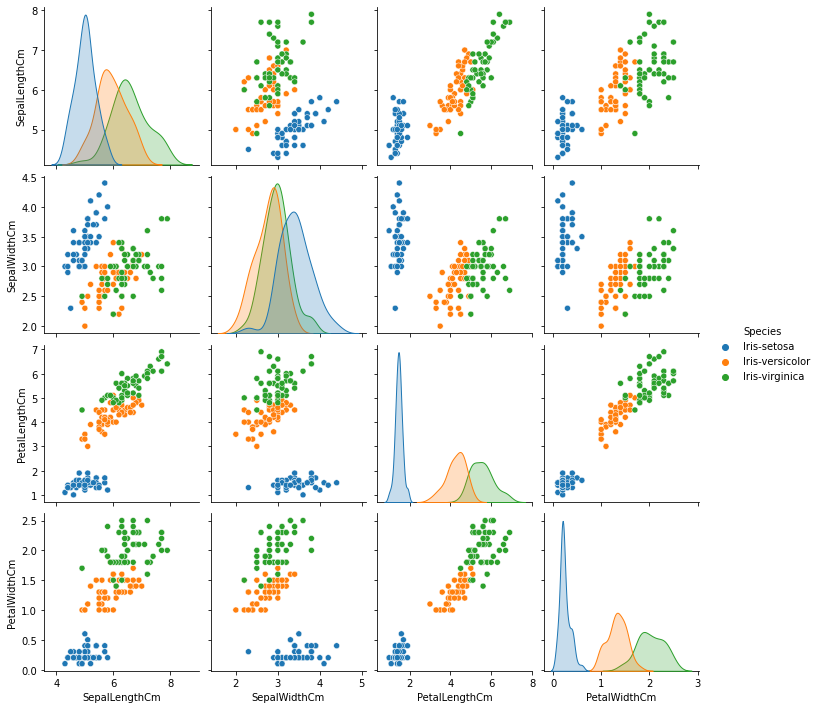

In [54]:
# Lets see some pairwise relationships in a dataset using a pairplot
sns.pairplot(iris,hue='Species')
plt.show()

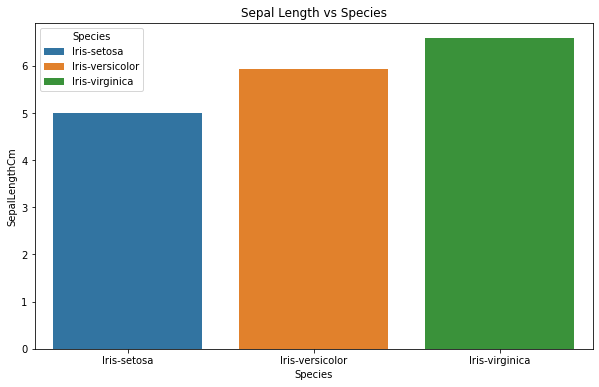

In [56]:
# Sepal Length Vs Species
plt.figure(figsize=(10,6))
sns.barplot(x='Species',y='SepalLengthCm',data=iris,hue='Species',ci=None,dodge=False)
plt.title("Sepal Length vs Species")
plt.show()

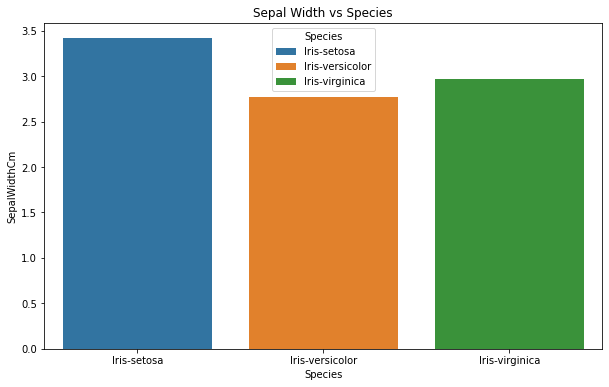

In [57]:
# Sepal Width Vs Species
plt.figure(figsize=(10,6))
sns.barplot(x='Species',y='SepalWidthCm',data=iris,hue='Species',ci=None,dodge=False)
plt.title("Sepal Width vs Species")
plt.show()

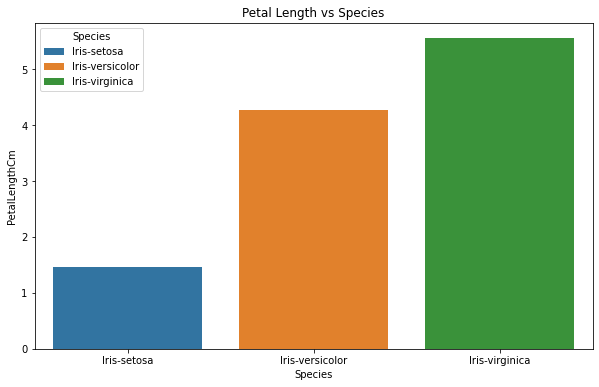

In [58]:
# Petal Length Vs Species
plt.figure(figsize=(10,6))
sns.barplot(x='Species',y='PetalLengthCm',data=iris,hue='Species',ci=None,dodge=False)
plt.title("Petal Length vs Species")
plt.show()

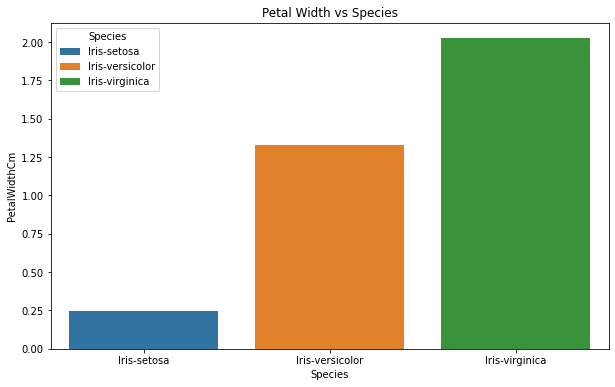

In [59]:
# Petal Width Vs Species
plt.figure(figsize=(10,6))
sns.barplot(x='Species',y='PetalWidthCm',data=iris,hue='Species',ci=None,dodge=False)
plt.title("Petal Width vs Species")
plt.show()

In [60]:
# Lets see the correlation between the features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


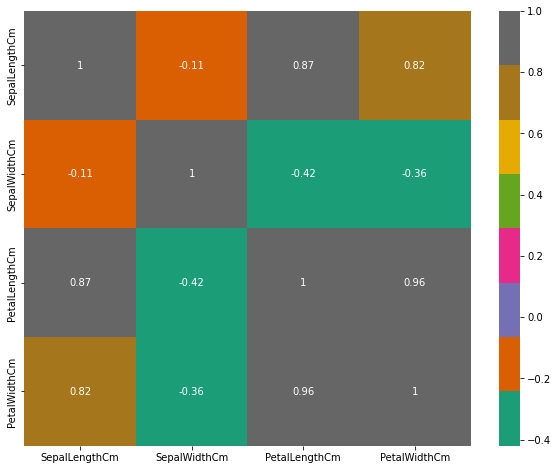

In [61]:
# Now we will plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=iris.corr(),annot=True,cmap='Dark2')
plt.show()

<h3>Data Preprocessing :</h3>

In [62]:
# Separate independent(X) and dependent(y) variables from iris
X = iris.drop(['Species'],axis=1)
y = iris['Species']

In [63]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
# check shape of each data
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (112, 4)
X_test : (38, 4)
y_train : (112,)
y_test : (38,)


<h3>Model Training and Performance :</h3>

<h3>Logistic Regression Model :</h3>

In [65]:
# create an instance of Logistic Regression
log_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial')

In [66]:
# fit the training data
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [67]:
# Check the score
log_reg.score(X_train,y_train)

0.9642857142857143

In [68]:
# predict on the test data
log_reg_pred = log_reg.predict(X_test)

In [69]:
# Check performance of this model

# Confusion Matrix
print("Confusion Matrix :\n", confusion_matrix(y_test, log_reg_pred))

# Accuracy Score
print("Accuracy Score :", accuracy_score(y_test, log_reg_pred))

# Classification Report
print("Classification Report :\n", classification_report(y_test, log_reg_pred))

Confusion Matrix :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy Score : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [70]:
log_reg_data = pd.DataFrame({"Actual":y_test, "Predicted":log_reg_pred})
log_reg_data

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


<h3>Decision Tree Classifier :</h3>

In [71]:
# create an instance of Decision Tree Classifier
dt = DecisionTreeClassifier()

In [72]:
# fit the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# check the score
dt.score(X_train, y_train)

1.0

In [74]:
# predict on the test data
dt_pred = dt.predict(X_test)

In [75]:
# Check performance of this model

# Confusion Matrix
print("Confusion Matrix :\n", confusion_matrix(y_test, dt_pred))

# Accuracy Score
print("Accuracy Score :", accuracy_score(y_test, dt_pred))

# Classification Report
print("Classification Report :\n", classification_report(y_test, dt_pred))

Confusion Matrix :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy Score : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [76]:
dt_data = pd.DataFrame({"Actual":y_test, "Predicted":dt_pred})
dt_data

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


<h3>Random Forest Classifier :</h3>

In [77]:
# create an instance of Random forest classifier
rf = RandomForestClassifier()

In [78]:
# fit the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# check the score
rf.score(X_train, y_train)

1.0

In [80]:
# predict on the test data
rf_pred = rf.predict(X_test)

In [81]:
# Check performance of this model

# Confusion Matrix
print("Confusion Matrix :\n", confusion_matrix(y_test, rf_pred))

# Accuracy Score
print("Accuracy Score :", accuracy_score(y_test, rf_pred))

# Classification Report
print("Classification Report :\n", classification_report(y_test, rf_pred))

Confusion Matrix :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy Score : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [82]:
rf_data = pd.DataFrame({"Actual":y_test, "Predicted":rf_pred})
rf_data

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [83]:
# Random data
data = [[3.5, 2.9, 1.9, 0.5]]

In [84]:
# Logistic Regression
log_reg.predict(data)

array(['Iris-setosa'], dtype=object)

In [85]:
# Decision Tree Classifier
dt.predict(data)

array(['Iris-setosa'], dtype=object)

In [86]:
# Random Forest Classifier
rf.predict(data)

array(['Iris-setosa'], dtype=object)

<h4>Summary :</h4><br>
    1. The iris dataset that we have used here has 150 rows and 6 columns out of which we dropped 'Id' column as it was not necessary for our analysis.<br>
    2. The target column "Species" has three unique classes which are : Iris-setosa, Iris-versicolor, Iris-virginica.<br>
    3. There were no null/missing values present in the data.<br>
    4. All the 3 models that we used for training i.e. Logistic Regression, Decision Tree Classifier and Random Forest Classifier had a very good accuracy and their precision, recall, accuracy score and f1 scores were 1. 